# 로컬 모델 제작

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import cifar10
from sklearn.preprocessing import *
import seaborn as sns

# Prepare Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# Build Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3), name='layer1'))
model.add(MaxPool2D(pool_size=2, name='layer2'))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu', name='layer3'))
model.add(MaxPool2D(pool_size=2, name='layer4'))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu', name='layer5'))
model.add(MaxPool2D(pool_size=2, name='layer6'))
model.add(Conv2D(filters=128, kernel_size=4, padding='same', strides=1, activation='relu', name='layer7'))
model.add(MaxPool2D(pool_size=2, name='layer8'))
model.add(Conv2D(filters=256, kernel_size=4, padding='same', strides=1, activation='relu', name='layer9'))
model.add(MaxPool2D(pool_size=2, name='layer10'))
model.add(Flatten(name='layer11'))
model.add(Dense(512, activation='relu', name='layer12'))
model.add(Dense(10, activation='softmax', name='final_layer'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 32, 32, 16)        784       
_________________________________________________________________
layer2 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 16, 16, 32)        8224      
_________________________________________________________________
layer4 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
layer5 (Conv2D)              (None, 8, 8, 64)          32832     
_________________________________________________________________
layer6 (MaxPooling2D)        (None, 4, 4, 64)          0         
_________________________________________________________________
layer7 (Conv2D)              (None, 4, 4, 128)         131200    
__________

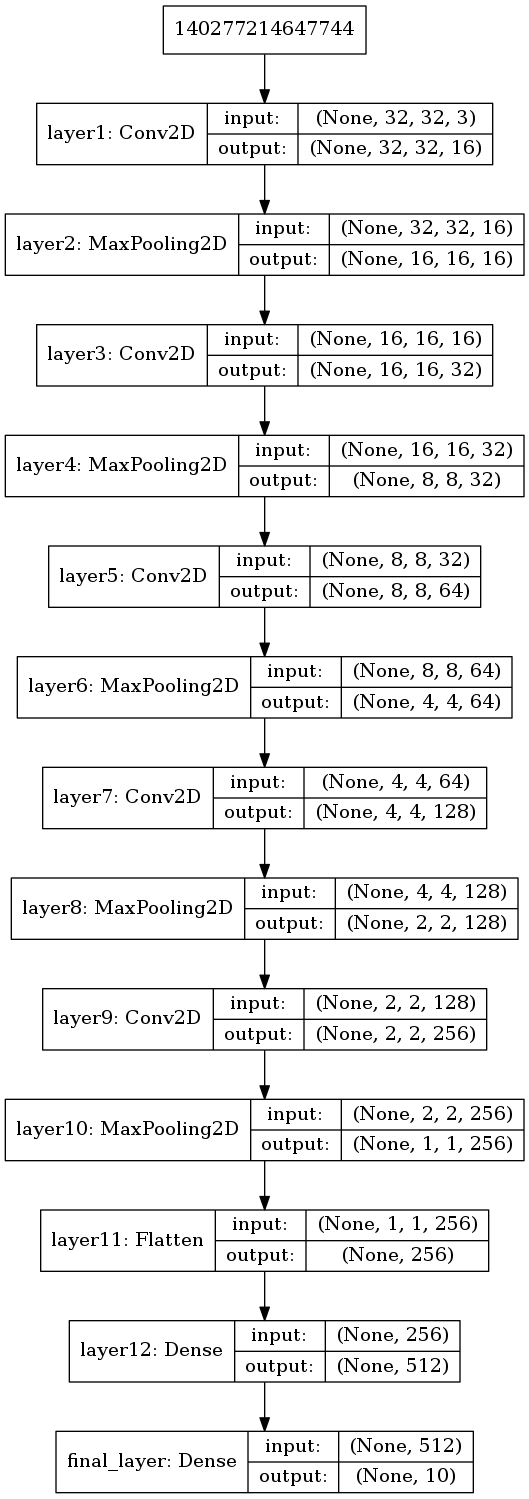

In [3]:
from keras.utils import plot_model
plot_model(model, to_file='modelCNN.png', show_shapes=True)
from IPython.display import Image
Image("modelCNN.png")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import cifar10
from sklearn.preprocessing import *
import seaborn as sns
from keras.models import Model

# make model
# ========================
# 레이어의 네이밍과 더불어 몇 번 index의 layer를 추출할 지와 shape만 받아오면 자동으로 서버입장에서 처리할 모델을 제작할 수 있다.
# ========================
def mymodel(index, shape):    
    print(str(index) + " layer delete")
    model = Sequential()        
    chk = 1 # filters multy    
    model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=shape, name='layer1'))
    
    for idx in range(index+1,11):       
        layer_num = 'layer' + str(idx)        
        if idx % 2 == 0:            
            model.add(MaxPool2D(pool_size=2, name=layer_num))
            chk = chk*2 # filters의 수를 조절하는 변수이다.
        else:
            model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', name=layer_num))
        
    model.add(Flatten(name='layer11'))
    model.add(Dense(512, activation='relu', name='layer12'))
    model.add(Dense(10, activation='softmax', name='final_layer'))
    model.summary()
    return model

# Prepare Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

scores = list()

# Train
for idx in range(1,5):
    processed_model = list()
    processed_model = mymodel(index=idx, shape=(32,32,3)) # index input
    processed_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    layer_name = 'layer' + str(idx+1)
    mergedmodel = Model(inputs=processed_model.input, outputs=processed_model.get_layer(layer_name).output)
    # mergedmodel.summary()

    features = mergedmodel.predict(X_train) # 잘나낸 레이어에 데이터를 통과시킨다.
    X_test2 = mergedmodel.predict(X_test) # test set 역시 통과시켜야 후에 evaluate가 가능하다.

    processed_model2 = mymodel(index=idx+1, shape=features[0].shape) # index input

    print("shape\n", features.shape)
    print("shape[0]\n", features[0].shape)
    # print("data\n",features[0])
    
    processed_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(str(idx) + "layer out train")
    processed_model2.fit(features, Y_train, epochs=5, batch_size=128, validation_data=(X_test2, Y_test))
    score = processed_model2.evaluate(X_test2, Y_test)
    scores.append(score)

1 layer delete
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 32, 32, 16)        784       
_________________________________________________________________
layer2 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 16, 16, 32)        8224      
_________________________________________________________________
layer4 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
layer5 (Conv2D)              (None, 8, 8, 64)          32832     
_________________________________________________________________
layer6 (MaxPooling2D)        (None, 4, 4, 64)          0         
_________________________________________________________________
layer7 (Conv2D)              (None, 4, 4, 128)         131200

KeyboardInterrupt: 

In [81]:
scores

[[1.1122591426849364, 0.6007]]

성능변화가 눈에 띄게 바뀌지 않는다. 이유가 무엇일까 위 코드의 문제를 수정한 쪽이 아래이다.

# 테스트 모델 제작

In [13]:
# Test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import cifar10
from sklearn.preprocessing import *
import seaborn as sns
from keras.models import Model

# make model
def mymodel(index, shape):
    print(str(index) + " layer delete")
    model = Sequential()        
    chk = 1 # filters multy    
    model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=shape, name='layer1'))
    
    for idx in range(1,11):
        if idx <= index:
            print(idx, index)
            print("under")
            if idx % 2 == 0:  
                chk = chk*2
            continue
            
        layer_num = 'layer' + str(idx)        
        if idx % 2 == 0:            
            model.add(MaxPool2D(pool_size=2, name=layer_num))
            chk = chk*2
        else:
            model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', name=layer_num))
        
    model.add(Flatten(name='layer11'))
    model.add(Dense(512, activation='relu', name='layer12'))
    model.add(Dense(10, activation='softmax', name='final_layer'))
    model.summary()
    return model

# Prepare Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

scores = list()

# Train
local_model = mymodel(index=1, shape=(32,32,3)) # index input
for idx in range(1,10):
    local_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    layer_name = 'layer' + str(idx+1)
    mergedmodel = Model(inputs=local_model.input, outputs=local_model.get_layer(layer_name).output)
    # mergedmodel.summary()

    features = mergedmodel.predict(X_train)
    X_test2 = mergedmodel.predict(X_test)

    processed_model2 = mymodel(index=idx+1, shape=features[0].shape) # index input

    print("shape\n", features.shape)
    print("shape[0]\n", features[0].shape)
    # print("data\n",features[0])
    
    processed_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(str(idx) + "layer out train")
    processed_model2.fit(features, Y_train, epochs=1, batch_size=128, validation_data=(X_test2, Y_test))
    score = processed_model2.evaluate(X_test2, Y_test)
    scores.append(score)

1 layer delete
1 1
under
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 32, 32, 16)        784       
_________________________________________________________________
layer2 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 16, 16, 32)        8224      
_________________________________________________________________
layer4 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
layer5 (Conv2D)              (None, 8, 8, 64)          32832     
_________________________________________________________________
layer6 (MaxPooling2D)        (None, 4, 4, 64)          0         
_________________________________________________________________
layer7 (Conv2D)              (None, 4, 4, 128)     

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s 210us/step
5 layer delete
1 5
under
2 5
under
3 5
under
4 5
under
5 5
under
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 8, 8, 16)          16400     
_________________________________________________________________
layer6 (MaxPooling2D)        (None, 4, 4, 16)          0         
_________________________________________________________________
layer7 (Conv2D)              (None, 4, 4, 128)         32896     
_________________________________________________________________
layer8 (MaxPooling2D)        (None, 2, 2, 128)         0         
_________________________________________________________________
layer9 (Conv2D)              (None, 2, 2, 256)         524544    
_________________________________________________________________
layer10 (MaxPooling2D)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 109us/step
10 layer delete
1 10
under
2 10
under
3 10
under
4 10
under
5 10
under
6 10
under
7 10
under
8 10
under
9 10
under
10 10
under
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 1, 1, 16)          65552     
_________________________________________________________________
layer11 (Flatten)            (None, 16)                0         
_________________________________________________________________
layer12 (Dense)              (None, 512)               8704      
_________________________________________________________________
final_layer (Dense)          (None, 10)                5130      
Total params: 79,386
Trainable params: 79,386
Non-trainable params: 0
_________________________________________________________________
shape
 (50000, 1, 1, 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import cifar10
from sklearn.preprocessing import *
import seaborn as sns
from keras.models import Model

# make model
def mymodel(index, shape):
    print(str(index) + " layer delete")
    model = Sequential()        
    chk = 1 # filters multy    
    model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=shape, name='layer1'))
    
    for idx in range(index+1,11):       
        layer_num = 'layer' + str(idx)        
        if idx % 2 == 0:            
            model.add(MaxPool2D(pool_size=2, name=layer_num))
            chk = chk*2
        else:
            model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', name=layer_num))
        
    model.add(Flatten(name='layer11'))
    model.add(Dense(512, activation='relu', name='layer12'))
    model.add(Dense(10, activation='softmax', name='final_layer'))
    model.summary()
    return model

# Prepare Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

scores = list()

# Train
local_model = mymodel(index=1, shape=(32,32,3)) # index input
for idx in range(1,10):
    local_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    layer_name = 'layer' + str(idx+1)
    mergedmodel = Model(inputs=local_model.input, outputs=local_model.get_layer(layer_name).output)
    # mergedmodel.summary()

    features = mergedmodel.predict(X_train)
    X_test2 = mergedmodel.predict(X_test)

    processed_model2 = mymodel(index=idx+1, shape=features[0].shape) # index input

    print("shape\n", features.shape)
    print("shape[0]\n", features[0].shape)
    # print("data\n",features[0])
    
    processed_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(str(idx) + "layer out train")
    processed_model2.fit(features, Y_train, epochs=1, batch_size=128, validation_data=(X_test2, Y_test))
    score = processed_model2.evaluate(X_test2, Y_test)
    scores.append(score)

1 layer delete


ValueError: The name "layer1" is used 2 times in the model. All layer names should be unique.

In [85]:
scores

[[1.4655028129577636, 0.4552],
 [1.5449180637359619, 0.4367],
 [1.706462178993225, 0.3637],
 [1.691636630630493, 0.3671],
 [1.795465768623352, 0.3154],
 [1.8328457397460938, 0.3127],
 [1.9318802825927734, 0.2715],
 [1.9968672714233398, 0.2403],
 [2.0935431980133057, 0.1749]]

# 실험 결과

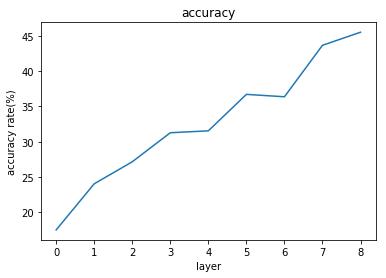

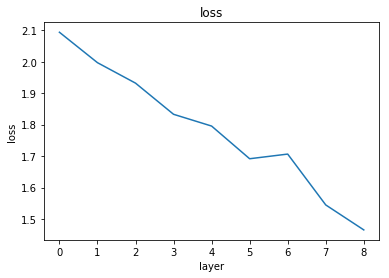

0

In [254]:
# 성능 변화
import matplotlib.pyplot as plt

loss = list()
acc = list()
for idx in range(len(scores)-1, -1, -1): # scores의 내용의 순서를 반전하여 불러온다.
    loss.append(scores[idx][0])
    acc.append(scores[idx][1] * 100)
    
x0 = [1,2,3,4,5,6,7,8,9]

def plot_loss(item):
    plt.figure()
    plt.title('loss')
    plt.xlabel('layer')
    plt.ylabel('loss')
    plt.plot(item)
    plt.show()
    return 0
   
def plot_acc(item):
    plt.figure()
    plt.title('accuracy')
    plt.xlabel('layer')
    plt.ylabel('accuracy rate(%)')
    plt.plot(item)
    plt.show()
    return 0

plot_acc(acc)
plot_loss(loss)

In [252]:
# scores 저장
import pandas as pd

print(scores)
score_pd = pd.DataFrame(scores, columns=['loss', 'acc'])
score_pd.head(10)
score_pd.to_csv("scores.csv", mode="w")

[[1.4655028129577636, 0.4552], [1.5449180637359619, 0.4367], [1.706462178993225, 0.3637], [1.691636630630493, 0.3671], [1.795465768623352, 0.3154], [1.8328457397460938, 0.3127], [1.9318802825927734, 0.2715], [1.9968672714233398, 0.2403], [2.0935431980133057, 0.1749]]


In [ ]:
## TESTING

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import cifar10
from sklearn.preprocessing import *
import seaborn as sns
from keras.models import Model

# make model
def mymodel(index, shape):
    print(str(index) + " layer delete")
    model = Sequential()        
    chk = 1 # filters multy    
    model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=shape, name='layer1'))
    
    for idx in range(index+1,11):       
        layer_num = 'layer' + str(idx)        
        if idx % 2 == 0:            
            model.add(MaxPool2D(pool_size=2, name=layer_num))
            chk = chk*2
        else:
            model.add(Conv2D(filters=16*chk, kernel_size=4, padding='same', strides=1, activation='relu', name=layer_num))
        
    model.add(Flatten(name='layer11'))
    model.add(Dense(512, activation='relu', name='layer12'))
    model.add(Dense(10, activation='softmax', name='final_layer'))
    model.summary()
    return model

# Prepare Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

scores = list()

# Visualization
local_model = mymodel(index=1, shape=(32,32,3)) # index input


for idx in range(1,10):
    local_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    layer_name = 'layer' + str(idx+1)
    mergedmodel = Model(inputs=local_model.input, outputs=local_model.get_layer(layer_name).output)
    # mergedmodel.summary()

    features = mergedmodel.predict(X_train)
    X_test2 = mergedmodel.predict(X_test)

    processed_model2 = mymodel(index=idx+1, shape=features[0].shape) # index input

    print("shape\n", features.shape)
    print("shape[0]\n", features[0].shape)
    # print("data\n",features[0])
    
    processed_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(str(idx) + "layer out train")
    processed_model2.fit(features, Y_train, epochs=1, batch_size=128, validation_data=(X_test2, Y_test))
    score = processed_model2.evaluate(X_test2, Y_test)
    scores.append(score)

In [158]:
layer_names = [layer.name for layer in local_model.layers]
layer_names

['layer1',
 'layer2',
 'layer3',
 'layer4',
 'layer5',
 'layer6',
 'layer7',
 'layer8',
 'layer9',
 'layer10',
 'layer11',
 'layer12',
 'final_layer']

In [159]:
local_model.layers

In [161]:
layer_outputs = [layer.output for layer in local_model.layers]

In [162]:
feature_map_model = Model(input=local_model.input, output=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("la..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [175]:
input_ = img
input_ = img.reshape((1,) + img.shape)                   
input_ /= 255.0

In [185]:
successive_feature_maps = feature_map_model.predict(input_)

In [177]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the layer1 is =======>> (1, 32, 32, 16)
The shape of the layer2 is =======>> (1, 16, 16, 16)
The shape of the layer3 is =======>> (1, 16, 16, 32)
The shape of the layer4 is =======>> (1, 8, 8, 32)
The shape of the layer5 is =======>> (1, 8, 8, 64)
The shape of the layer6 is =======>> (1, 4, 4, 64)
The shape of the layer7 is =======>> (1, 4, 4, 128)
The shape of the layer8 is =======>> (1, 2, 2, 128)
The shape of the layer9 is =======>> (1, 2, 2, 256)
The shape of the layer10 is =======>> (1, 1, 1, 256)
The shape of the layer11 is =======>> (1, 256)
The shape of the layer12 is =======>> (1, 512)
The shape of the final_layer is =======>> (1, 10)


(1, 32, 32, 16)
(1, 16, 16, 16)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 4, 4, 64)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 256)
(1, 512)
(1, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


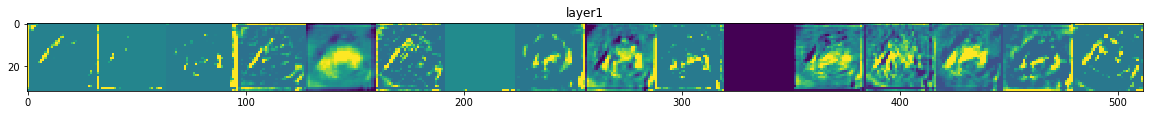

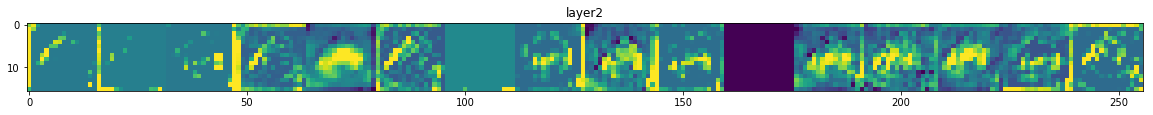

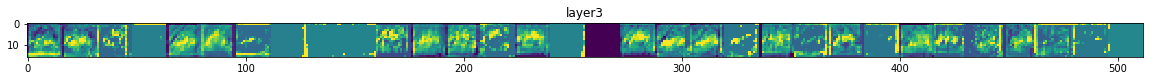

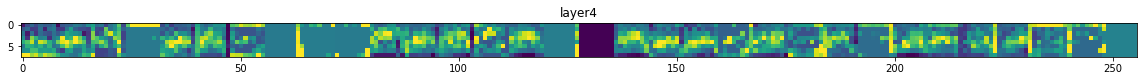

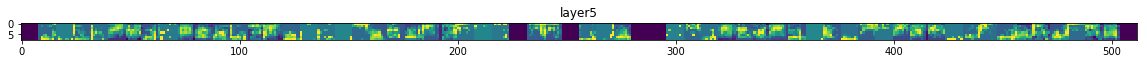

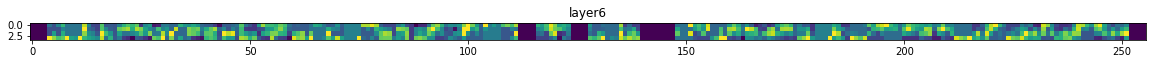

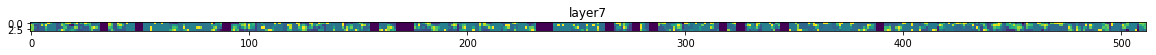

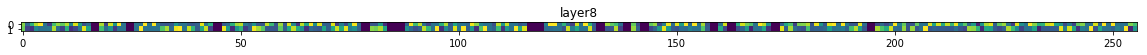

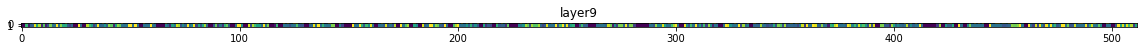

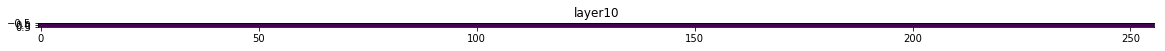

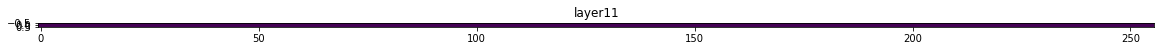

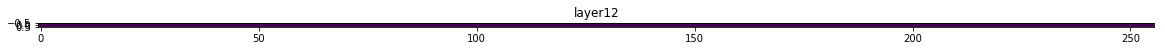

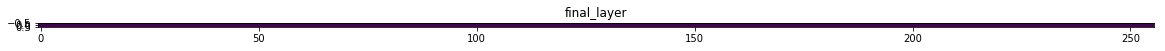

In [186]:
layer_names = [layer.name for layer in local_model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
          # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


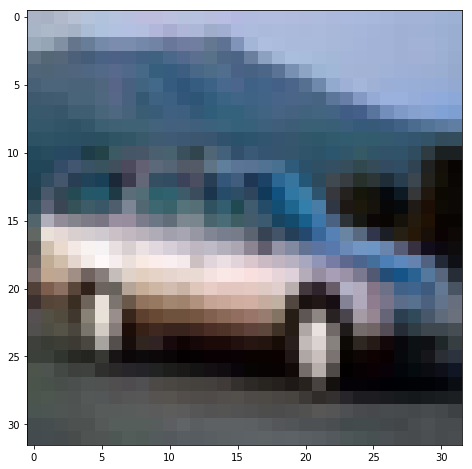

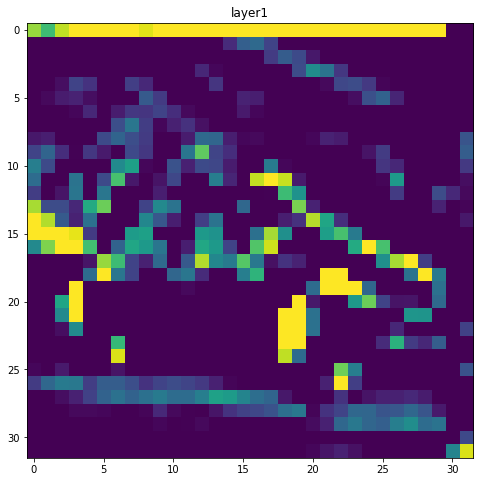

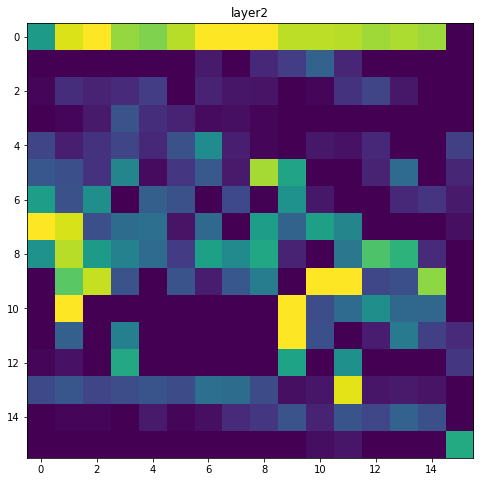

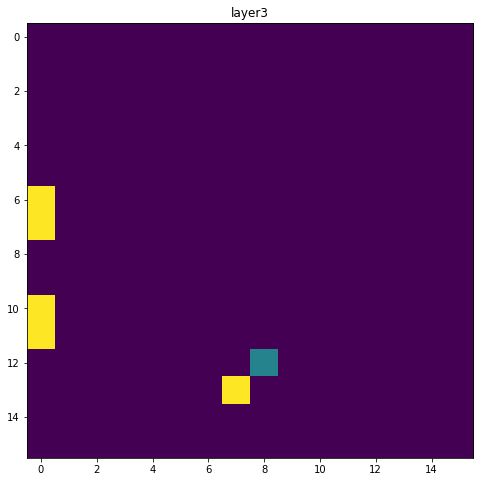

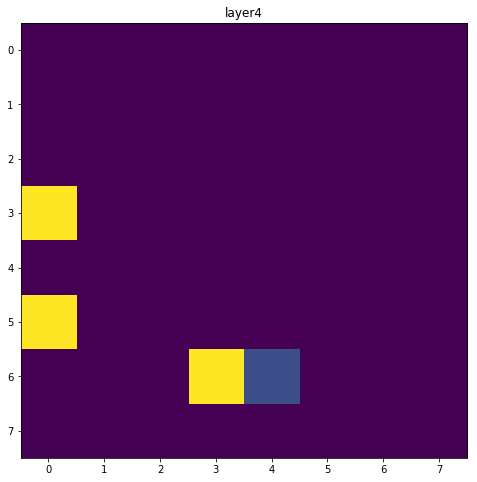

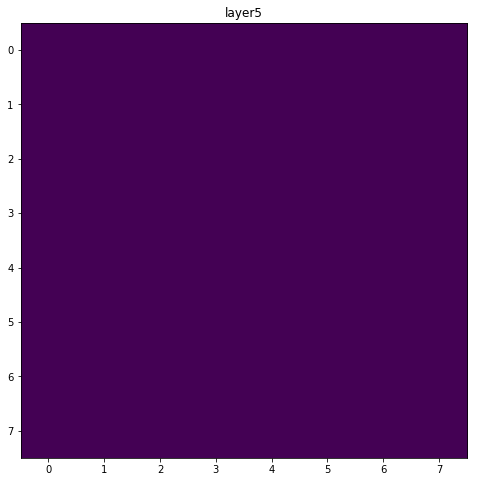

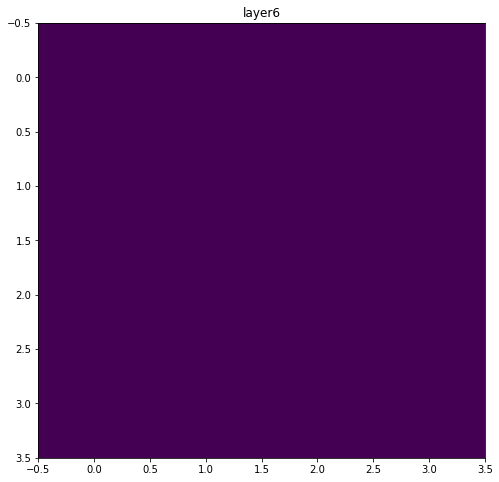

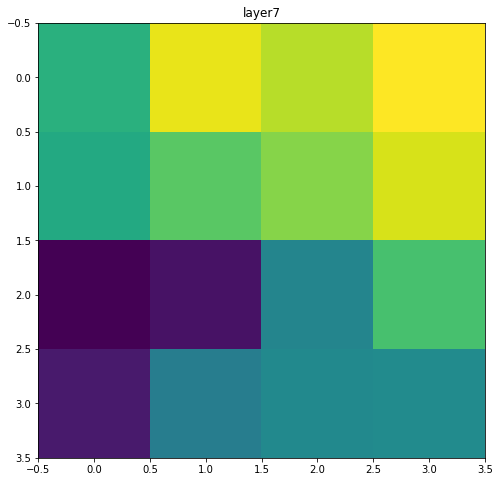

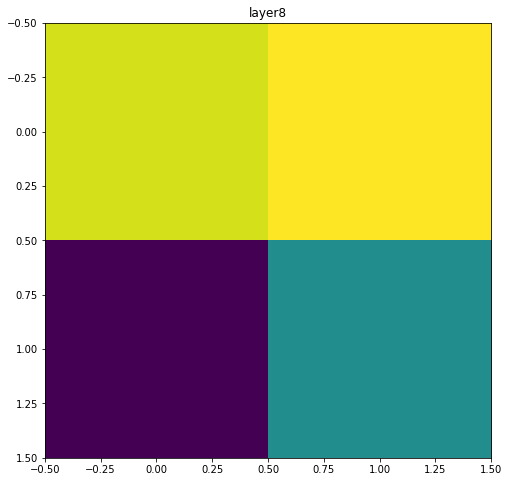

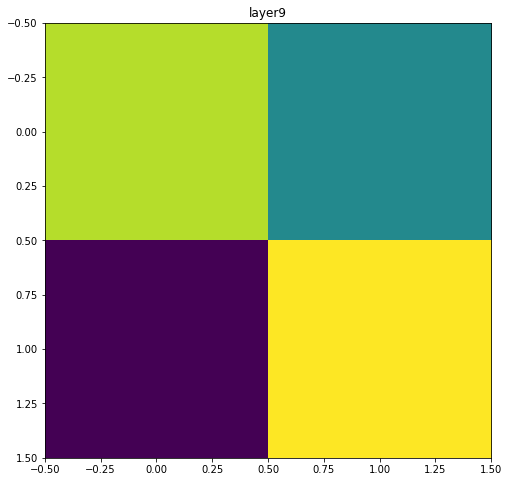

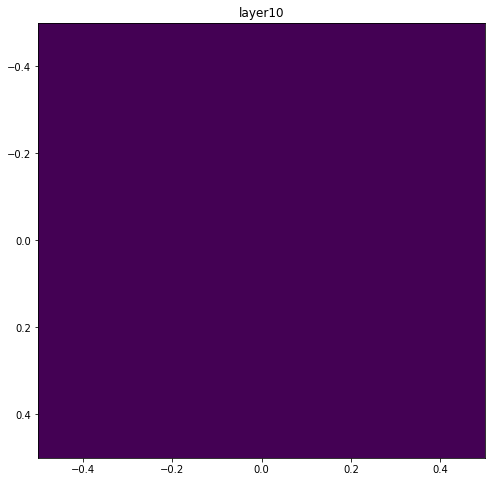

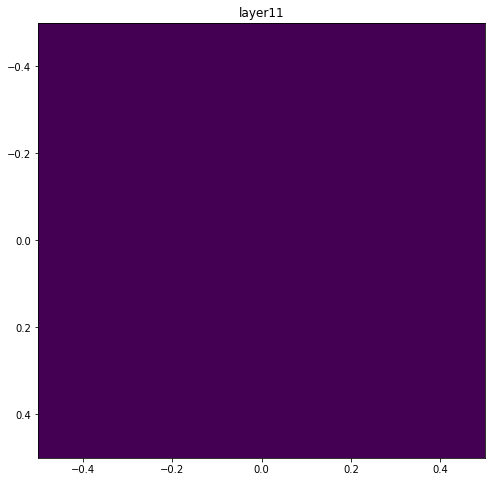

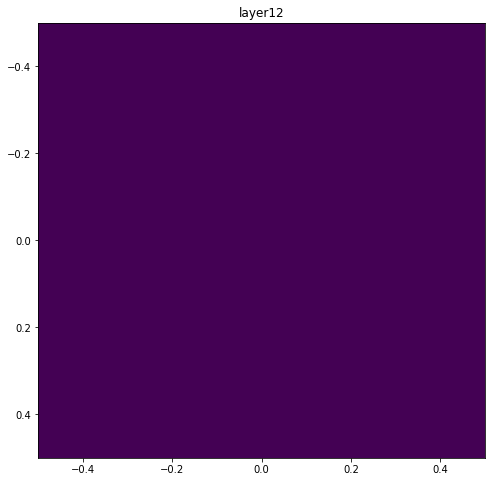

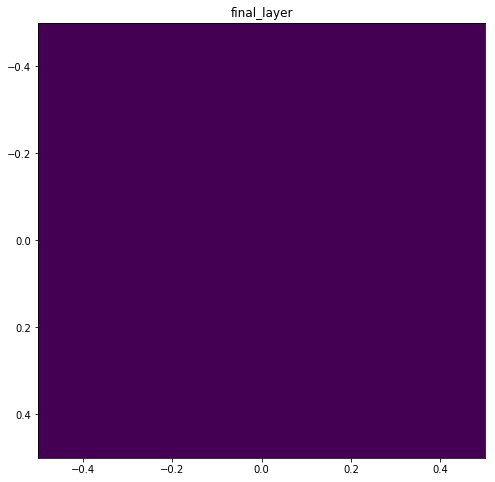

In [237]:
img = X_train[4]
plt.figure(figsize=(8,8))
plt.imshow(img)
input_ = img
input_ = img.reshape((1,) + img.shape)                   
input_ /= 255.0
successive_feature_maps = feature_map_model.predict(input_)

layer_names = [layer.name for layer in local_model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
          # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(8,8) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( x, aspect='auto', cmap='viridis' )